## Observations and Insights 

1-Mice treated with Capomulin had decreased tumor volume over time 
2-For mice on Capomulin the heavier they were the bigger their tumors.
3-Box plot for four regiemens shows that the outliers are found at the lower volumes. Possibly indicating the regimens have a positive effect of reducing tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data=study_results.merge(mouse_metadata,on='Mouse ID',how='left')
# Display the data table for preview
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
import numpy as np
unique_mouse=np.unique(mouse_data['Mouse ID'])
len(unique_mouse)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_dup=mouse_data[mouse_data.duplicated(subset=['Mouse ID','Timepoint'], keep =False)]
mouse_id_dup=np.unique(mouse_data_dup['Mouse ID'])

print("The duplicate mice by ID number that shows up for Mouse ID and Timepoint:", mouse_id_dup)

The duplicate mice by ID number that shows up for Mouse ID and Timepoint: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data[mouse_data['Mouse ID'].isin(mouse_id_dup)]
#mouse_data.loc[mouse_data['Mouse ID'].isin(mouse_id_dup),:]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_no_dup=mouse_data[~mouse_data.duplicated(subset=['Mouse ID','Timepoint'])]
mouse_data_no_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
mouse_data_no_dup['Timepoint']

0        0
1        0
2        0
3        0
4        0
        ..
1888    45
1889    45
1890    45
1891    45
1892    45
Name: Timepoint, Length: 1888, dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_no_dup=np.unique(mouse_data_no_dup['Mouse ID'])
len(unique_mouse_no_dup)

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [9]:
mean=mouse_data_no_dup.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()  
SD=mouse_data_no_dup.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
median=mouse_data_no_dup.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
SEM=mouse_data_no_dup.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
var=mouse_data_no_dup.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

In [10]:
summary_stats=pd.DataFrame({'Mean':mean,'Median':median,'Variance':var,'SD':SD,'SEM':SEM})
summary_stats

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data_no_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of timepoints for all mice tested by drug regimen'}, xlabel='Drug Regimen'>

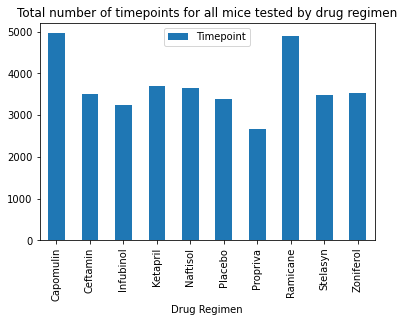

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_data_no_dup.groupby(['Drug Regimen']).sum().plot(kind='bar', y='Timepoint',title='Total number of timepoints for all mice tested by drug regimen')



<AxesSubplot:title={'center':'Total number of timepoints for all mice tested by drug regimen'}, xlabel='Drug Regimen'>

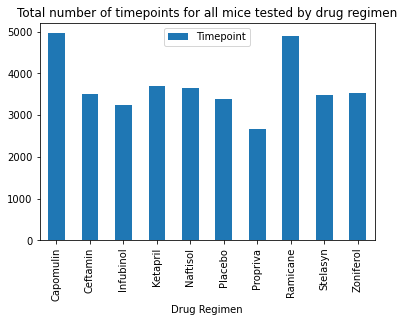

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_data_no_dup.groupby(['Drug Regimen']).sum().plot(kind='bar', y='Timepoint',title='Total number of timepoints for all mice tested by drug regimen')



<AxesSubplot:title={'center':'Distribution of female vs male mice'}, ylabel='Sex'>

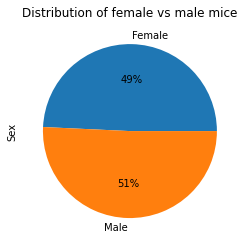

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data_no_dup.groupby(['Sex']).size().plot(kind='pie',label='Sex',autopct='%1.0f%%',title='Distribution of female vs male mice')


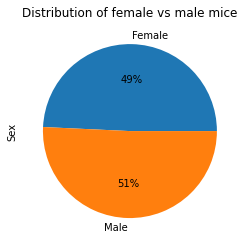

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = mouse_data_no_dup.groupby(['Sex']).size()
plt.pie(data, labels=data.index, autopct='%1.0f%%')
plt.title('Distribution of female vs male mice')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest=mouse_data_no_dup.loc[mouse_data_no_dup.groupby('Mouse ID').Timepoint.idxmax(),:]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#https://towardsdev.com/outlier-detection-using-iqr-method-and-box-plot-in-python-82e1e15232bd
latest.merge(mouse_data_no_dup)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=mouse_data_no_dup['Drug Regimen']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_data_no_dup.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)']
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
mouse_data_no_dup.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)']
    
    
    # add subset 
final_tumor_vol=pd.DataFrame(mouse_data_no_dup.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].sum()).reset_index()    
    
    # Determine outliers using upper and lower bounds
iqr=st.iqr(mouse_data_no_dup['Tumor Volume (mm3)'])
Q1 = np.percentile(mouse_data_no_dup['Tumor Volume (mm3)'] , 25)
Q3 = np.percentile(mouse_data_no_dup['Tumor Volume (mm3)'] , 75)
ul=Q3+1.5*iqr
ll=Q1-1.5*iqr
outliers = mouse_data_no_dup[(mouse_data_no_dup['Tumor Volume (mm3)'] > ul) | (mouse_data_no_dup['Tumor Volume (mm3)'] < ll)]


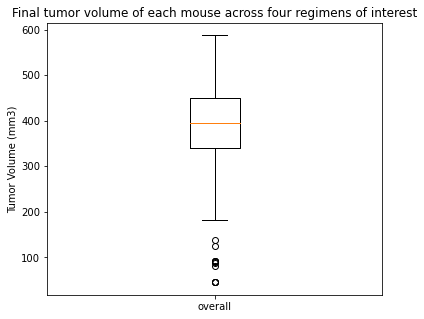

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(figsize=(6,5))
regimens_of_interest=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data=final_tumor_vol[final_tumor_vol['Drug Regimen'].isin(regimens_of_interest)]
plt.boxplot(data['Tumor Volume (mm3)'])
plt.xticks([1],['overall'])
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final tumor volume of each mouse across four regimens of interest')
plt.show()

## Line and Scatter Plots

In [19]:
latest.sort_values(by='Mouse ID')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1783,a262,45,70.717621,4,Placebo,Female,17,29
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1401,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
499,z435,10,48.710661,0,Propriva,Female,12,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
1784,z581,45,62.754451,3,Infubinol,Female,24,25
1887,z795,45,65.741070,3,Naftisol,Female,13,29


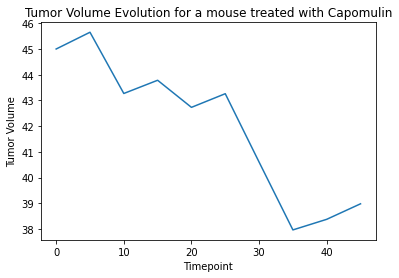

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data_no_dup_capomulim=mouse_data_no_dup[(mouse_data_no_dup['Drug Regimen']=="Capomulin") & (mouse_data_no_dup['Mouse ID']=='b128')]

plt.plot(mouse_data_no_dup_capomulim['Timepoint'],mouse_data_no_dup_capomulim['Tumor Volume (mm3)'])
plt.title('Tumor Volume Evolution for a mouse treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

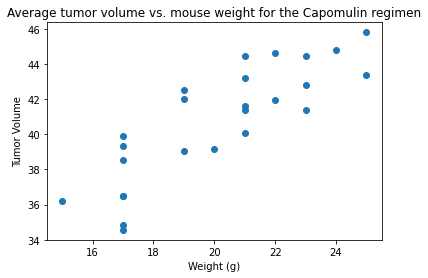

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_weight_capomulin=pd.DataFrame(mouse_data_no_dup[(mouse_data_no_dup['Drug Regimen']=="Capomulin")].groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()
plt.scatter(avg_tumor_weight_capomulin['Weight (g)'], avg_tumor_weight_capomulin['Tumor Volume (mm3)'] )
plt.title('Average tumor volume vs. mouse weight for the Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.pearsonr(avg_tumor_weight_capomulin['Weight (g)'], avg_tumor_weight_capomulin['Tumor Volume (mm3)'])[0]

0.8419363424694719